# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 261


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
base_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = f"{url}appid={api_key}&units={units}&q="
    city_url = base_url + city
    # print(city_url)
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        data = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data.get("coord", {}).get("lat")
        city_lng = data.get("coord", {}).get("lon")
        city_max_temp = data.get("main", {}).get("temp_max")
        city_humidity = data.get("main", {}).get("humidity")
        city_clouds = data.get("clouds", {}).get("all")
        city_wind = data.get("wind", {}).get("speed")
        city_country = data.get("sys", {}).get("country")
        city_date = data.get("dt", {})

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | taiohae
Processing Record 4 of Set 1 | grez-doiceau
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | labrador city
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | rio san juan
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | katsuren-haebaru
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | namtsy
Processing Record 20 of Set 1 | tanki leendert
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | por

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          261
Lat           249
Lng           249
Max Temp      249
Humidity      249
Cloudiness    249
Wind Speed    249
Country       249
Date          261
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,48.09,58.0,20.0,8.05,CA,1716823620
1,katsuura,35.1333,140.3000,72.19,92.0,100.0,26.17,JP,1716823620
2,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,None,{}
3,grez-doiceau,50.7390,4.6983,64.71,75.0,75.0,4.61,BE,1716823621
4,grytviken,-54.2811,-36.5092,31.30,82.0,49.0,11.56,GS,1716823621


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,48.09,58.0,20.0,8.05,CA,1716823620
1,katsuura,35.1333,140.3000,72.19,92.0,100.0,26.17,JP,1716823620
2,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}
3,grez-doiceau,50.7390,4.6983,64.71,75.0,75.0,4.61,BE,1716823621
4,grytviken,-54.2811,-36.5092,31.30,82.0,49.0,11.56,GS,1716823621


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

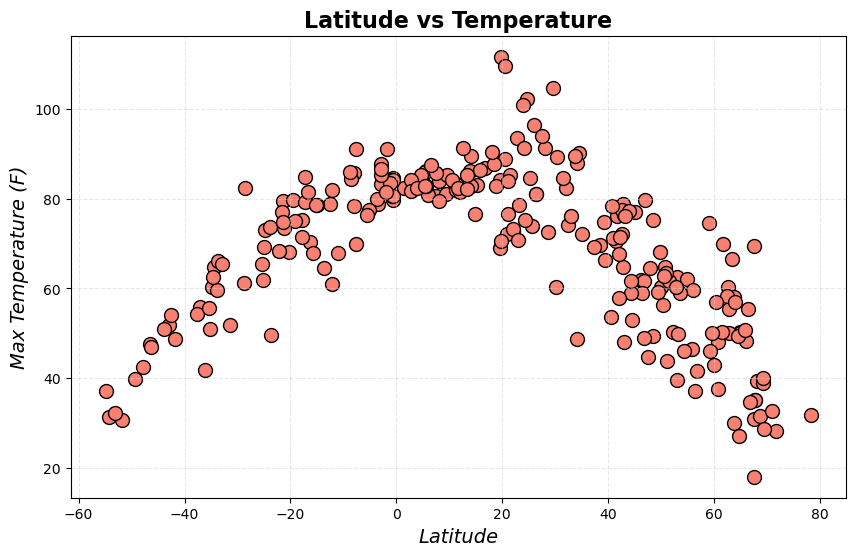

In [11]:
# Build scatter plot for latitude vs. temperature
x = city_data_df.Lat
y = city_data_df["Max Temp"]
# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="salmon", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=14, fontstyle="italic")
plt.ylabel("Max Temperature (F)", fontsize=14, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

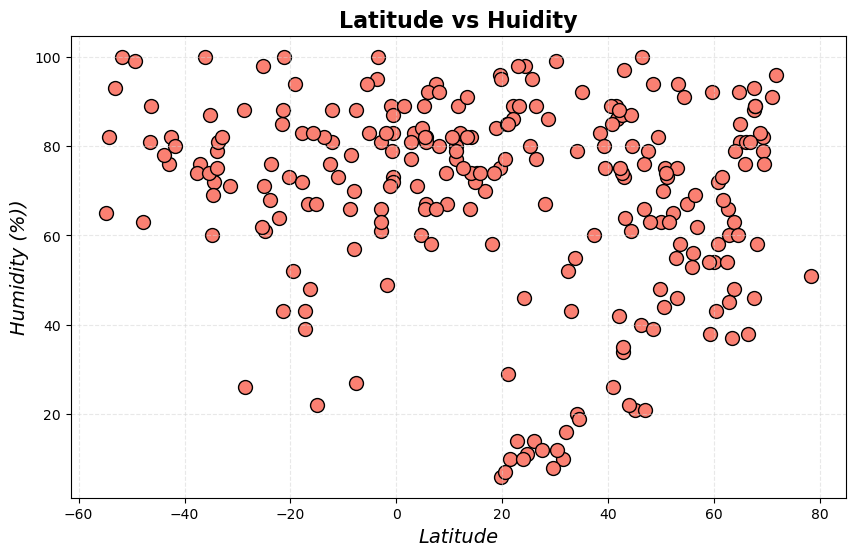

In [12]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df.Lat
y = city_data_df.Humidity
# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="salmon", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=14, fontstyle="italic")
plt.ylabel("Humidity (%))", fontsize=14, fontstyle="italic")
plt.title("Latitude vs Huidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

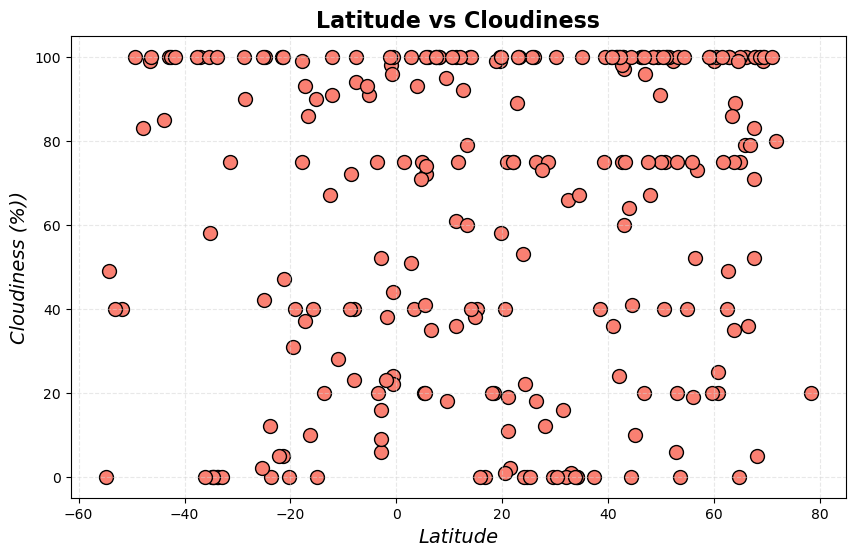

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df.Lat
y = city_data_df.Cloudiness
# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="salmon", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=14, fontstyle="italic")
plt.ylabel("Cloudiness (%))", fontsize=14, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

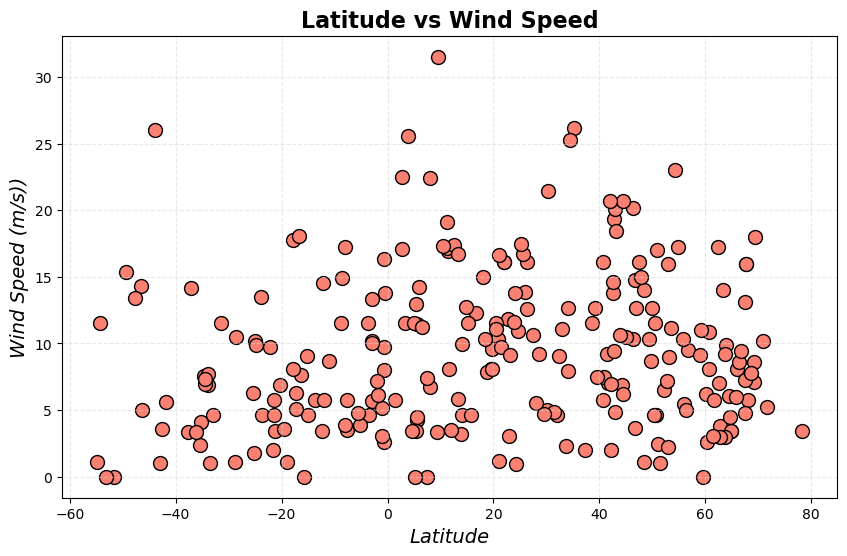

In [14]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df.Lat
y = city_data_df["Wind Speed"]
# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="salmon", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=14, fontstyle="italic")
plt.ylabel("Wind Speed (m/s))", fontsize=14, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# x_values_north = city_data_df.Lat
# y_values_north = city_data_df["Max Temp"]

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,48.09,58.0,20.0,8.05,CA,1716823620
1,katsuura,35.1333,140.3000,72.19,92.0,100.0,26.17,JP,1716823620
3,grez-doiceau,50.7390,4.6983,64.71,75.0,75.0,4.61,BE,1716823621
6,ribeira grande,38.5167,-28.7000,69.78,83.0,40.0,11.50,PT,1716823621
7,labrador city,52.9463,-66.9114,62.51,46.0,20.0,15.99,CA,1716823621


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,grytviken,-54.2811,-36.5092,31.30,82.0,49.0,11.56,GS,1716823621
5,blackmans bay,-43.0167,147.3167,51.93,76.0,100.0,1.01,AU,1716823621
8,puerto natales,-51.7236,-72.4875,30.65,100.0,40.0,0.00,CL,1716823622
13,adamstown,-25.0660,-130.1015,69.24,71.0,42.0,10.22,PN,1716823622
14,port elizabeth,-33.9180,25.5701,65.32,79.0,0.0,6.91,ZA,1716823622


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6592529208098269


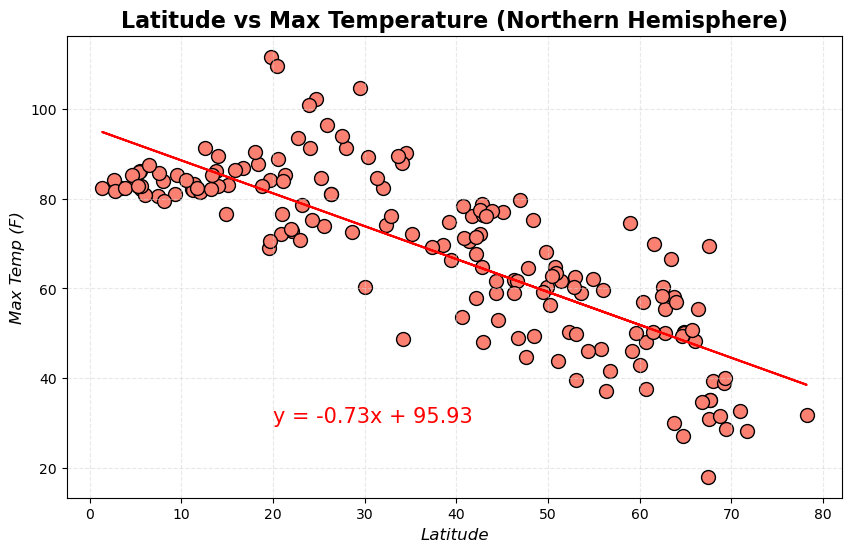

In [23]:
# Linear regression on Northern Hemisphere
x_values_north = northern_hemi_df.Lat
y_values_north = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))

plt.scatter(x_values_north, y_values_north, facecolor="salmon", edgecolor="black", s=100)
plt.plot(x_values_north, regress_values, "r-") 

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Max Temp (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Max Temperature (Northern Hemisphere)", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(20, 30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.8015497865811675


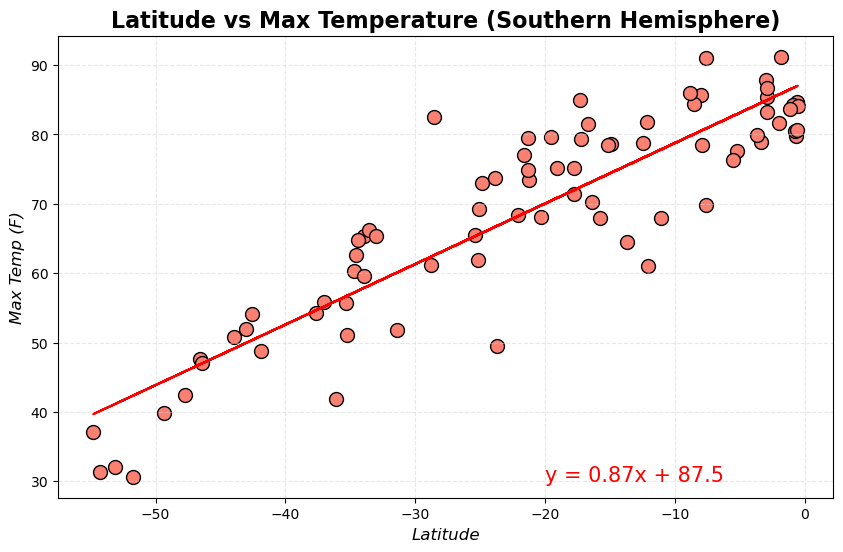

In [24]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df.Lat
y_values_south = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))

plt.scatter(x_values_south, y_values_south, facecolor="salmon", edgecolor="black", s=100)
plt.plot(x_values_south, regress_values, "r-") 

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Max Temp (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Max Temperature (Southern Hemisphere)", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(-20, 30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The relationship between latitude and temperature for both northern and souther cities have a strong relationship. For northern hemisphere cities, as latitude gets larger, the temperature gets colder. Inversely, for cities in the southern hemisphere, as latitute gets smaller, temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.004428779737848877


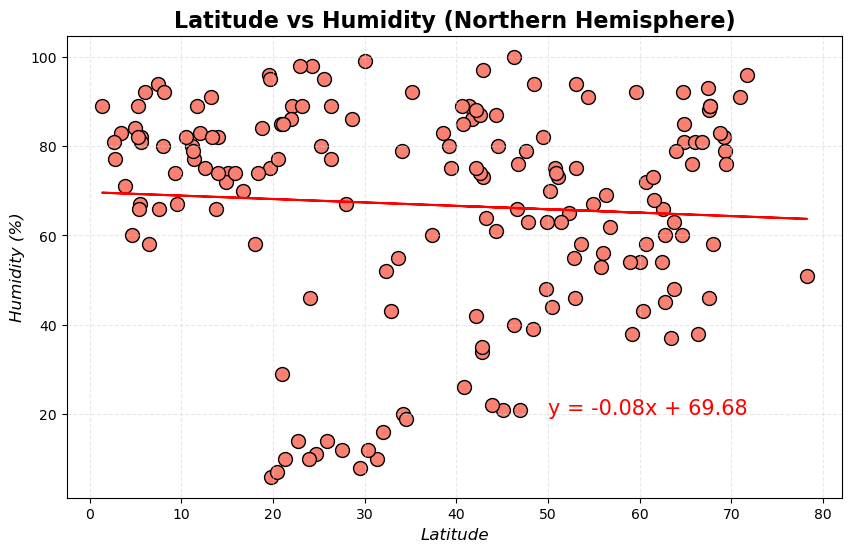

In [25]:
# Northern Hemisphere
x_values_north2 = northern_hemi_df.Lat
y_values_north2 = northern_hemi_df.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north2, y_values_north2)
regress_values = x_values_north2 * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))

plt.scatter(x_values_north2, y_values_north2, facecolor="salmon", edgecolor="black", s=100)
plt.plot(x_values_north2, regress_values, "r-") 

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity (Northern Hemisphere)", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(50, 20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.021162004659852452


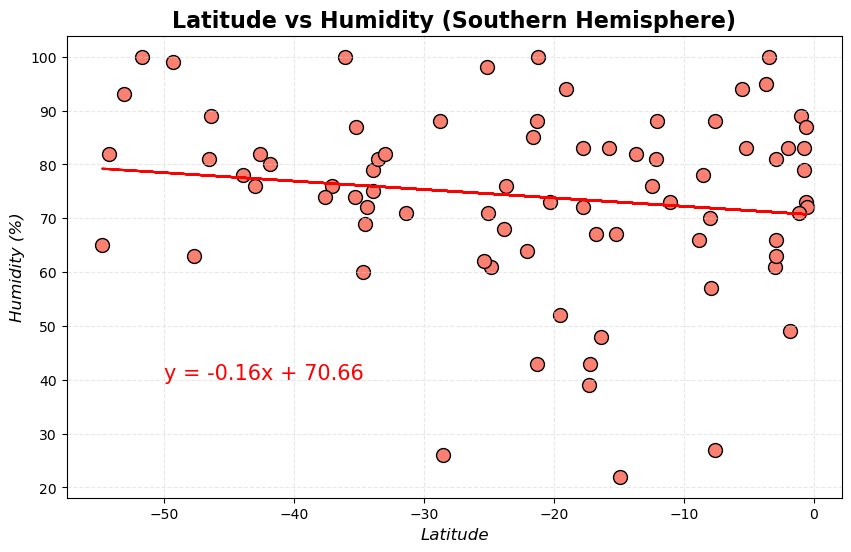

In [26]:
# Southern Hemisphere
x_values_south2 = southern_hemi_df.Lat
y_values_south2 = southern_hemi_df.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south2, y_values_south2)
regress_values = x_values_south2 * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))

plt.scatter(x_values_south2, y_values_south2, facecolor="salmon", edgecolor="black", s=100)
plt.plot(x_values_south2, regress_values, "r-") 

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity (Southern Hemisphere)", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(-50, 40),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.013573333957154125


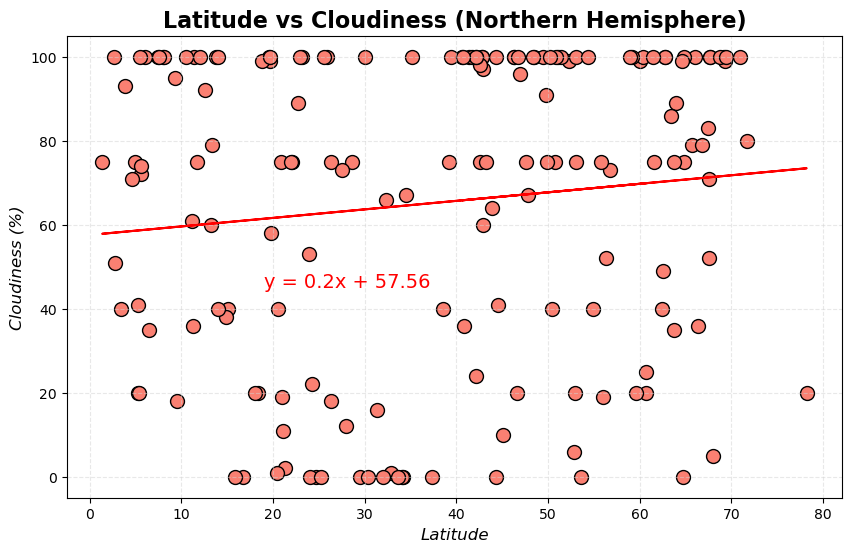

In [27]:
# Northern Hemisphere
x_values_north3 = northern_hemi_df.Lat
y_values_north3 = northern_hemi_df.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north3, y_values_north3)
regress_values = x_values_north3 * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))

plt.scatter(x_values_north3, y_values_north3, facecolor="salmon", edgecolor="black", s=100)
plt.plot(x_values_north3, regress_values, "r-") 

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness (%)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness (Northern Hemisphere)", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(19, 45),fontsize=14,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0036625962604757804


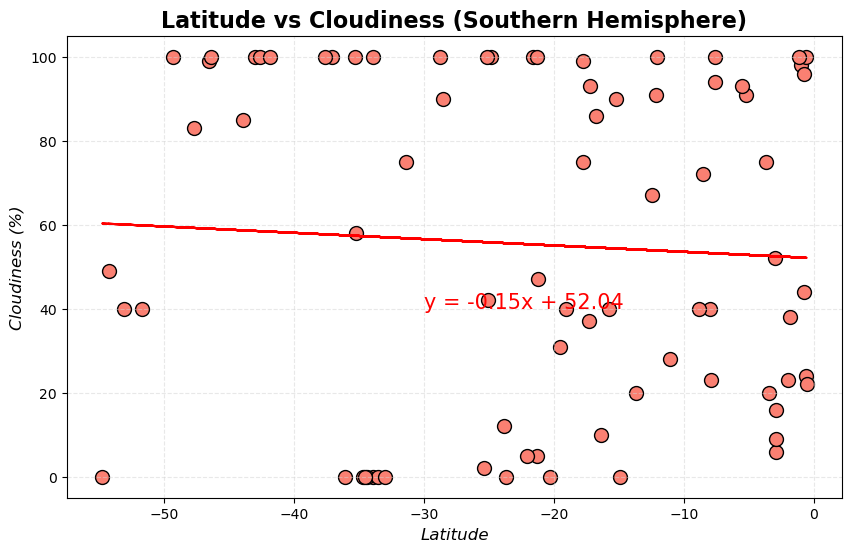

In [28]:
# Southern Hemisphere
x_values_south3 = southern_hemi_df.Lat
y_values_south3 = southern_hemi_df.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south3, y_values_south3)
regress_values = x_values_south3 * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))

plt.scatter(x_values_south3, y_values_south3, facecolor="salmon", edgecolor="black", s=100)
plt.plot(x_values_south3, regress_values, "r-") 

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness (%)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness (Southern Hemisphere)", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(-30, 40),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** For both cities in the southern and northern hemispheres, there is not significant relationship between cloudiness % and latitude. The R squared vales for both respective regressions imply that there is no relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.029367094816474124


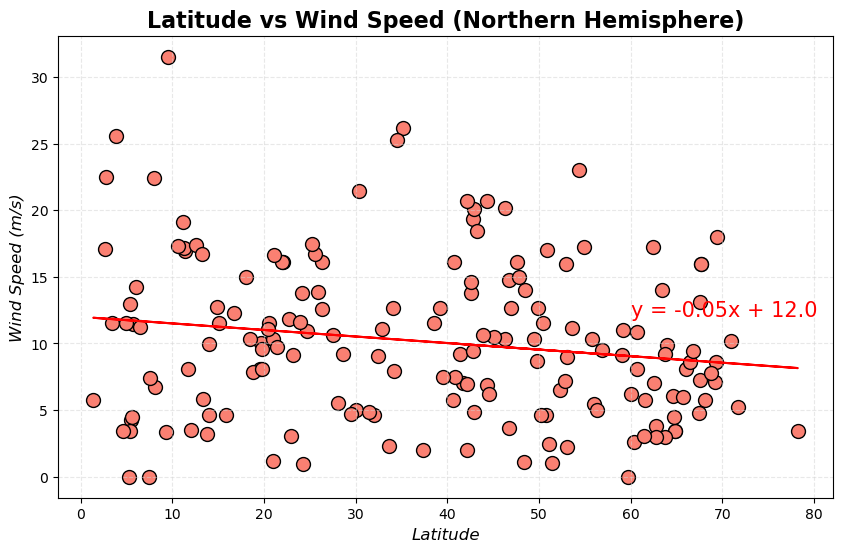

In [29]:
# Northern Hemisphere
x_values_north4 = northern_hemi_df.Lat
y_values_north4 = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north4, y_values_north4)
regress_values = x_values_north4 * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))

plt.scatter(x_values_north4, y_values_north4, facecolor="salmon", edgecolor="black", s=100)
plt.plot(x_values_north4, regress_values, "r-") 

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (m/s)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed (Northern Hemisphere)", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(60, 12),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.006636589210208752


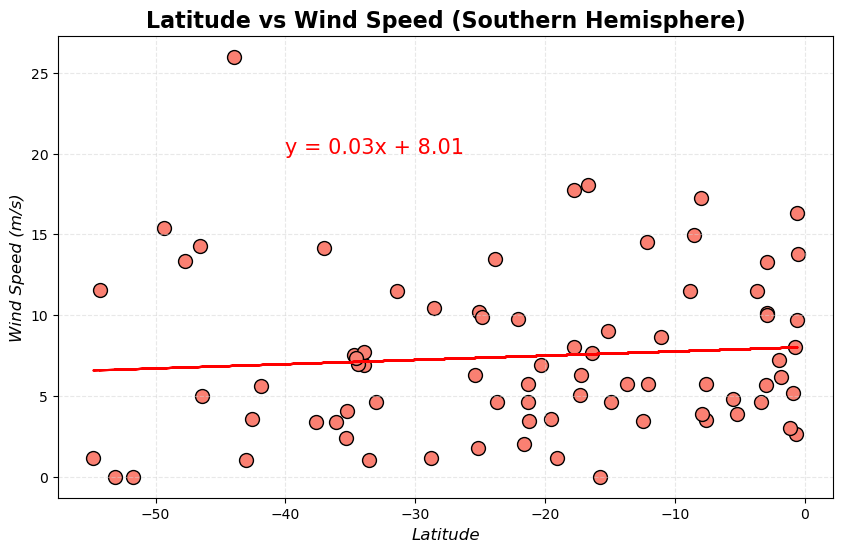

In [30]:
# Southern Hemisphere
x_values_south4 = southern_hemi_df.Lat
y_values_south4 = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south4, y_values_south4)
regress_values = x_values_south4 * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))

plt.scatter(x_values_south4, y_values_south4, facecolor="salmon", edgecolor="black", s=100)
plt.plot(x_values_south4, regress_values, "r-") 

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (m/s)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed (Southern Hemisphere)", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(-40, 20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** For both cities in the southern and northern hemispheres, there is not significant relationship between wind speed and latitude. The R squared vales for both respective regressions imply that there is no relationship.